# Images as Data Lab

Welcome to the images as data lab! By the end of this lecture, you will have

1. Combined images to make new images
2. Gained intuition for image template matching
3. Used convolution for feature detection
4. Used max-pooling to downsample images

Let's get started!

## Load Images

In [230]:
from IPython.display import display
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import array_to_img, img_to_array

[X_mnist, y_mnist], _ = mnist.load_data()
X_mnist = np.expand_dims(X_mnist, axis=1).astype(np.float)
imgs = [array_to_img(x, data_format='channels_first').resize(size=[128, 128]) for x in X_mnist]
X = np.array([img_to_array(img) for img in imgs])

In [246]:
X.shape

(60000, 128, 128, 1)

#### Consider the Following Two Images...

In [231]:
X_mnist.shape


(60000, 1, 28, 28)

In [20]:
#test subtraction
test_image = array_to_img(X_mnist[1,:,:,:] - 100 , data_format='channels_first')

In [21]:
test_image 

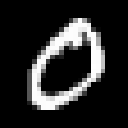

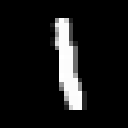

In [3]:
img0, img6 = imgs[1], imgs[6]

display(img0)
display(img6)

### Questions

Before doing anything, what will the resulting image will look like when we...

1. Add them?
2. Subtract them?
    1. Does the order of the subtraction matter? That is, will the resulting image look different depending on the order of the subtraction?
3. Multiply them?

>  
- 1) Adding the matrices will take the pixel intensities and add them to gether elementwise. The resulting image will be a combination of a 0 and a 1.
- 2) Subtracting them will take the pixel intensity of one number and subtract from another number. It does depend on the order of the subtraction becuase you will either take a positive value and subtract another positive value or 0 and subtract a postiive value ( for a negative value) . The image on the left hand side of the subtraction will be very black.
- 3) In multiplication order does not matter (for elementwise multiplication). The only regions that are active will be where both pixel intensities are >0.

### Tasks

- Compute these images to verify your answer

### Requirements

- Threshold each resulting image so that their minimum value is `0`

### Hints

- Recall how to convert back and forth between numpy arrays and PIL images. You will be doing this often during this lab.

![Converting Images](images/Converting%20Images.png)

In [30]:
addition_1 = array_to_img(img_to_array(img0) + img_to_array(img6))
addition_2 = array_to_img(img_to_array(img6) + img_to_array(img0))

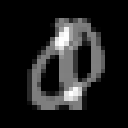

In [31]:
addition_1


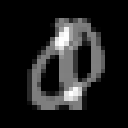

In [32]:
addition_2

In [ ]:
# the same for addition

In [33]:
subtract_1 = array_to_img(img_to_array(img0) - img_to_array(img6))
subtract_2 = array_to_img(img_to_array(img6) - img_to_array(img0))

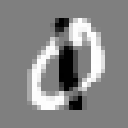

In [34]:
subtract_1

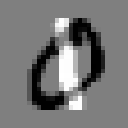

In [35]:
subtract_2

In [36]:
# Order matters for subtraction

In [42]:
multiply_1 = array_to_img(img_to_array(img0).T @ img_to_array(img6))
multiply_2 = array_to_img(img_to_array(img6).T @ img_to_array(img0))

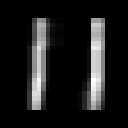

In [43]:
multiply_1 

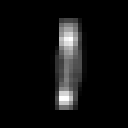

In [44]:
multiply_2 

In [47]:
elementmultiply_1 = array_to_img(img_to_array(img0) * img_to_array(img6))
elementmultiply_2 = array_to_img(img_to_array(img6) * img_to_array(img0))

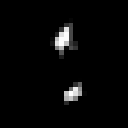

In [48]:
elementmultiply_1

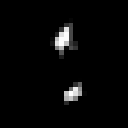

In [49]:
elementmultiply_2

#### Consider the following three images...

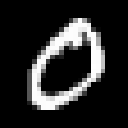

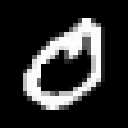

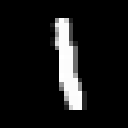

In [50]:
img0, img0_, img1 = imgs[1], imgs[21], imgs[6]

display(img0)
display(img0_)
display(img1)

### Questions

- Will `np.sum(x0*x0_) > np.sum(x0*x1)` or `np.sum(x0*x0_) < np.sum(x0*x1)`? Justify your answer with intuition.

- $np.sum(x0*x0_) > np.sum(x0*x1)$  because you are computing the element-wise product which is only >0 is both pixel intensities are >0. For two digits that are 0, this will be a much higher value than multiply a 0 number with a 1 number.

### Tasks

- Compute these quantities to verify your answer

In [51]:
np.sum(img_to_array(img0)* img_to_array(img0_))

1.3415969e+08

In [52]:
np.sum(img_to_array(img0)* img_to_array(img1))

28086248.0

### Questions

- Consider the following keras architecture for classifying MNIST digits

![MNIST Keras](images/MNIST%20Keras.png)
and that we have optimized $\mathbf{W}$ to produce high scores for the correct digit class.

If we take $w_i$ and *reshape it back into a $28 \times 28$ image* and display it, what might it look like? Why might this be the case?

- The weight matrix will be edges of each number (i.e vertical line, horizontal line, diagonal line)

### Tasks

- Define this architecture and train this model for 5 epochs in keras
- Reshape each $w_i$ back to a $28 \times 28$ image and display it

### Hints

- Use a softmax layer + categorical cross entropy loss
- Transform `y` from a `1darray` to a categorical `2darray` with `keras.utils.np_utils.to_categorical()`
    - Use the `28x28` `X_minst` variable as opposed to the `128x128` `X` variable in scope
- Use `keras.layers.Layer.get_weights()` to get the weights of a layer

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import keras as keras

In [83]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [85]:
# Munge data
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print('Number of train examples:', x_train.shape[0])
print('Number of test examples:', x_test.shape[0])

Number of train examples: 60000
Number of test examples: 10000


In [87]:
x_train.shape

(60000, 784)

In [207]:
# define our model
model = Sequential()

In [208]:
layer_output = Dense(units=10, input_shape=(784,),
                     activation='softmax')

model.add(layer_output)


In [209]:
learning_rate = 0.25 #best

model.compile(optimizer=SGD(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [210]:
batch_size = 128
epochs = 10 # 20 is good number; But let's limit it to 5

In [211]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.4573 - acc: 0.8777 - val_loss: 0.3320 - val_acc: 0.9076

In [212]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                7850      
Total params: 7,850.0
Trainable params: 7,850
Non-trainable params: 0.0
_________________________________________________________________


In [213]:
score = model.evaluate(x_test, 
                       y_test, 
                       verbose=True)

 8352/10000 [========================>.....] - ETA: 0s

In [214]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.273434130839
Test accuracy: 0.9231


In [215]:
layer_output.get_weights()[0][:,0].reshape(28,28).shape

(28, 28)

In [216]:
 X_mnist.shape

(60000, 1, 28, 28)

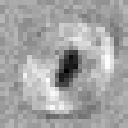

In [248]:
# weights for detecting zero
array_to_img(layer_output.get_weights()[0][:,0].reshape(28,28,1)).resize([128,128])

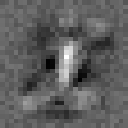

In [249]:
# weights for detecting one
array_to_img(layer_output.get_weights()[0][:,1].reshape(28,28,1)).resize([128,128])

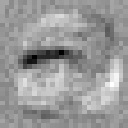

In [250]:
# weights for detecting two
array_to_img(layer_output.get_weights()[0][:,2].reshape(28,28,1)).resize([128,128])

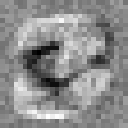

In [251]:
# weights for detecting three
array_to_img(layer_output.get_weights()[0][:,3].reshape(28,28,1)).resize([128,128])

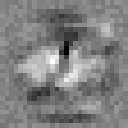

In [252]:
# weights for detecting four
array_to_img(layer_output.get_weights()[0][:,4].reshape(28,28,1)).resize([128,128])

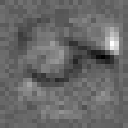

In [253]:
# weights for detecting five
array_to_img(layer_output.get_weights()[0][:,5].reshape(28,28,1)).resize([128,128])

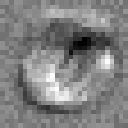

In [254]:
# weights for detecting six
array_to_img(layer_output.get_weights()[0][:,6].reshape(28,28,1)).resize([128,128])

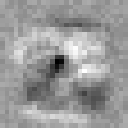

In [255]:
# weights for detecting seven
array_to_img(layer_output.get_weights()[0][:,7].reshape(28,28,1)).resize([128,128])

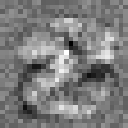

In [256]:
# weights for detecting eight
array_to_img(layer_output.get_weights()[0][:,8].reshape(28,28,1)).resize([128,128])

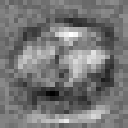

In [257]:
# weights for detecting nine
array_to_img(layer_output.get_weights()[0][:,9].reshape(28,28,1)).resize([128,128])

### Questions

- List two advantages of using a linear classifier for images. List two disadvantages.

>Advantages
- Speed: Linear classifiers are much faster to train compared to a NN architecture. 
- Interpretability: For linear classifiers, it is much easier to understand what the weights correspond to (even if they do not look like much above)

>Disadvantages
- Accuracy: Linear classifiers do not perform as well as NN architectures for classifying images.
- Feature representation: NN architecture can linear non-linear relationships, which is very helpful for classifying images correctly.

- Compare and contrast a logistic regression MNIST classifier and a KNN classifier. When might a KNN classifier outperform linear regression?

>- Linear regression is good for data that contains a linear relationship (i.e can separate with a straight line). This logistic (linear) classifier will work well for classes without a lot of intra-class variation (i.e. all numbers in the class generally look the same).
- KNN will perform when you care a lot about locality in the image (i.e. where you are currently in the image can help predict the surrounding neighbors). Since these images all have pixels intensities grouped in clusters, KNN should perform better on most of these images. For images that have a lot of intra-class variation, KNN will perform better.

## Averaging Images

### Questions

- What do you think the resulting image of averaging all images of `0` would look like? What about the average image for other numbers?

>- Averaging all numbers of 0 will produce a blurry zero number that is the most defined in the regions that are overlapping for all images.
- This same effect will happen for all of the other numbers

### Tasks

- Compute the average image for every number and display it to verify your answer

### Hints

- Start by just handling `0` and then wrap this logic in a `for` loop to handle the remaining numbers

In [282]:
y_mnist.shape

(60000,)

In [233]:
X_mnist.shape

(60000, 1, 28, 28)

In [283]:
def averaging_func(labels,data,numbers_to_average=0):

    filtered = data[labels == numbers_to_average, :]
    return np.mean(filtered,axis=0).reshape(28,28,1)
    

In [287]:
[display(array_to_img(averaging_func(y_mnist,x_train,_))) for _ in range(10)]

[None, None, None, None, None, None, None, None, None, None]

### Questions

- How do these images compare with the columns of $W$ from the previous section? Do they look similar? Why might this be the case?

In [288]:
# These images do for the most part look similar. The weights are learning the primary features for each number
# which is very similar to averaging each number across all of the iterations.

# Convolution

Consider the filter $
F =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$
and the image $x =$

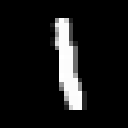

In [289]:
img1

- What will the resuling activation map $x \star F$ look like? What types of patches does $F$ produce the strongest activations for?

- The activation map will show the vertical edges for this image. The patches that have a 0 on the left and the pixel activation (1 for highest) on the right, till produce the strongest activation.

### Tasks

- Convolve $w$ with $x$ and display the result

### Hints

- Use `scipy.signal.correlate2d()` with `mode='valid'`
- Since `scipy.signal.correlate2d()` expects a `2darray`, you will have to remove the color dimension from `x` with indexing and then tack it back on to the activation map returned by `scipy.signal.correlate2d()` with `np.expand_dims(axis=0)`

In [295]:
from scipy.signal import correlate2d

In [290]:
w = np.array([[-1,0,1],
             [-1,0,1],
             [-1,0,1]])

In [303]:
img1_reshape  = img_to_array(img1).reshape(128,128)

In [304]:
img1_reshape.shape

(128, 128)

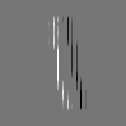

In [307]:
array_to_img(correlate2d(img1_reshape,w, mode='valid').reshape(126,126,1))

### Questions

- What about the filters
$
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix},
\
\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix},
\
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix},
\
\begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix},
\
\begin{bmatrix}
0 & 0 & 1 \\
0 & 1 & -1.5 \\
1 & -1.5 & 0
\end{bmatrix},
\
\begin{bmatrix}
1 & -1.5 & 0 \\
0 & 1 & -1.5 \\
0 & 0 & 1
\end{bmatrix}?
$

### Tasks

- Convolve these filters with $x$ and display the resulting activation maps to verify your answer

### Hints

- Write a function that convolves a filter with an image and displays the resulting activation map

In [339]:
def convolution(filter_,image):
    print('Filter is {}'.format(filter_))
    
    return array_to_img(correlate2d(img1_reshape,filter_, mode='valid').reshape(126,126,1))

In [340]:
filter1 = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]])
filter2 = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])
filter3 = np.array([[-1,-1,-1],
                   [0,0,0],
                   [1,1,1]])
filter4 = np.array([[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]])
filter5 = np.array([[0,0,1],
                   [0,1,-1.5],
                   [-1,-1.5,0]])
filter5 = np.array([[-1,-1.5,0],
                   [0,1,-1.5],
                   [0,0,1]])

In [341]:
list_of_filters = [filter1,filter2,filter3,filter4,filter5]

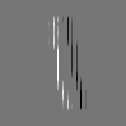

In [346]:
images[0]

In [343]:
images = [convolution(filter_item,img1_reshape) for filter_item in list_of_filters]

Filter is [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
Filter is [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Filter is [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Filter is [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
Filter is [[-1.  -1.5  0. ]
 [ 0.   1.  -1.5]
 [ 0.   0.   1. ]]


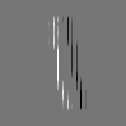

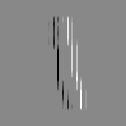

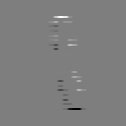

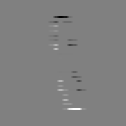

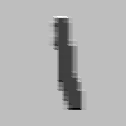

[None, None, None, None, None]

In [344]:
[display(i) for i in images]

## Pooling

We can think of a single convolutional image as a feature detector. For example, in the previous section we considered convolutional filters which produced strong activations for vertical edges. Instead of retaining the entire activation map (i.e. all the features that a single filter produces), we can downsample these activations by performing *max-pooling*.

### Questions

- List two reasons why max-pooling is useful and list two downsides.

> Advantages
- Find the most important features with max-pooling (highest pixel activation)
- Helps prevent overfitting of the images

> Disadvantages
- Loss of information. You may be missing out on feature extraction for secondary features in the image.
- May increase computational complexity by adding another layer

### Tasks

- Perform max-pooling on one of the activation maps from the previous section. Try different values `block_size` (e.g. in the range `1-20`)

### Hints

- Use `skimage.measure.block_reduce(..., func=np.max)` for **max**-pooling

In [319]:
from skimage.measure import block_reduce

In [322]:
img1_reshape.shape

(128, 128)

In [335]:
img_0_reshape = img_to_array(img0).reshape(128,128).shape

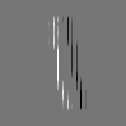

In [356]:
images[0]

In [359]:
activation_vertical = img_to_array(images[0]).reshape(126,126)

In [360]:
activation_vertical.shape

(126, 126)

In [349]:
img1_reshape.shape

(128, 128)

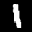

In [351]:
# max pooling on the original image
array_to_img(block_reduce(img1_reshape ,block_size=(4,4),func=np.max).reshape(32,32,1))

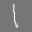

In [374]:
# max pooling on the vertical filter
array_to_img(block_reduce(activation_vertical ,block_size=(4,4),func=np.max).reshape(32,32,1))

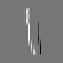

In [384]:
# max pooling on the vertical filter
array_to_img(block_reduce(activation_vertical ,block_size=(2,2),func=np.max).reshape(63,63,1))